In [8]:
import random as rd
import numpy as np
import seaborn as sns
import pandas as pd

In [12]:
df = pd.read_csv("/content/drive/MyDrive/Deeplearning/cardio_train.csv")

In [13]:
df.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio  70000 non-null  object
dtypes: object(1)
memory usage: 547.0+ KB


In [15]:
# use sep=" "
df = pd.read_table("/content/drive/MyDrive/Deeplearning/cardio_train.csv", sep=";")

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [16]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for name in df.columns:
    df[name] = le.fit_transform(df[name])
    df[name].fillna(int(df[name].median()), inplace=True)

In [20]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,3464,1,75,75,37,43,0,0,0,0,1,0
1,1,5030,0,63,173,67,53,2,0,0,0,1,1
2,2,3833,0,72,85,57,33,2,0,0,0,0,1
3,3,2811,1,76,157,77,63,0,0,0,0,1,1
4,4,2662,0,63,52,27,23,0,0,0,0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


In [22]:
target = df.pop('cardio')
features = df

In [23]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
features = mm.fit_transform(features)

In [24]:
from sklearn.model_selection import train_test_split


x,x_test,y,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2, random_state=42)

features.shape

(70000, 12)

In [25]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
activation ='relu'
model.add(keras.layers.Flatten(input_shape=[12]))
model.add(keras.layers.Dense(400,activation=activation))
model.add(keras.layers.Dense(200,activation=activation))
model.add(keras.layers.Dense(100,activation=activation))
model.add(keras.layers.Dense(50,activation=activation))
model.add(keras.layers.Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12)                0         
                                                                 
 dense (Dense)               (None, 400)               5200      
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 7)                 357       
                                                                 
Total params: 110907 (433.23 KB)
Trainable params: 11090

In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
history = model.fit(x_train,y_train,validation_data = (x_val,y_val),epochs=20 )

Epoch 1/20
1400/1400 [==============================] - 11s 6ms/step - loss: 0.5872 - accuracy: 0.7006 - val_loss: 0.5676 - val_accuracy: 0.7248
Epoch 2/20
1400/1400 [==============================] - 9s 6ms/step - loss: 0.5572 - accuracy: 0.7219 - val_loss: 0.5484 - val_accuracy: 0.7248
Epoch 3/20
1400/1400 [==============================] - 8s 5ms/step - loss: 0.5537 - accuracy: 0.7262 - val_loss: 0.5423 - val_accuracy: 0.7323
Epoch 4/20
1400/1400 [==============================] - 10s 7ms/step - loss: 0.5528 - accuracy: 0.7265 - val_loss: 0.5412 - val_accuracy: 0.7296
Epoch 5/20
1400/1400 [==============================] - 10s 7ms/step - loss: 0.5507 - accuracy: 0.7273 - val_loss: 0.5380 - val_accuracy: 0.7379
Epoch 6/20
1400/1400 [==============================] - 8s 6ms/step - loss: 0.5508 - accuracy: 0.7294 - val_loss: 0.5453 - val_accuracy: 0.7333
Epoch 7/20
1400/1400 [==============================] - 9s 6ms/step - loss: 0.5482 - accuracy: 0.7296 - val_loss: 0.5385 - val_accura

In [28]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

438/438 [==============================] - 1s 3ms/step


Accuracy: 0.738
precision: 0.7467532467532467
recall: 0.7216200798630918


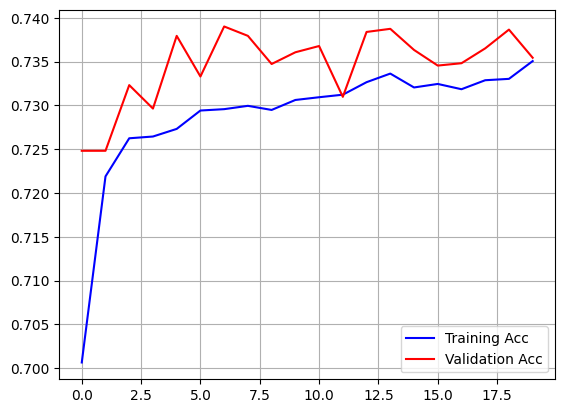

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],c='b')
plt.plot(history.history['val_accuracy'],c='r')
plt.grid()
plt.legend(['Training Acc','Validation Acc'])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")